In [2]:
import matplotlib.pyplot as pyplot
import pandas
import numpy

In [118]:
data = pandas.read_csv('production-data.csv', sep=',')
months = [(str(i + 1) + ' month') for i in xrange(0, 6)]

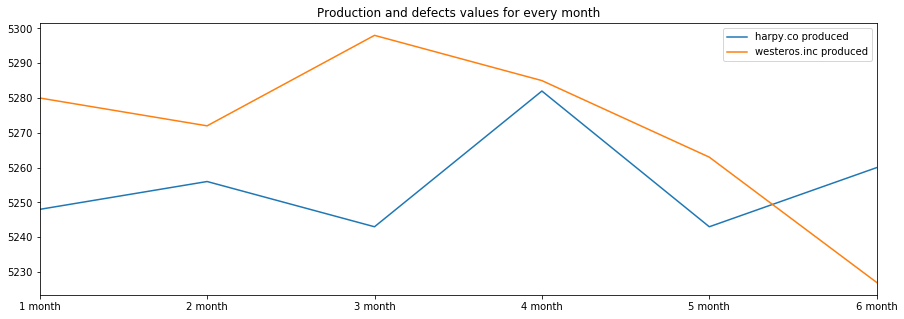

In [111]:
supplier_creation = data.groupby(['supplier', 'production.date']);
produced_sum = supplier_creation['produced'].sum()
harpy_creation_produced = numpy.array(produced_sum['harpy.co'])
westeros_creation_produced = numpy.array(produced_sum['westeros.inc'])


plt = pandas.DataFrame(data=(numpy.array([harpy_creation_produced, westeros_creation_produced])).transpose())
plt.columns = ['harpy.co produced', 'westeros.inc produced']

plot = plt.plot(kind='line', figsize=(15, 5), style=['-', '-'])
plot.set_xticklabels(months)

pyplot.title('Production values for every month')
pyplot.show()

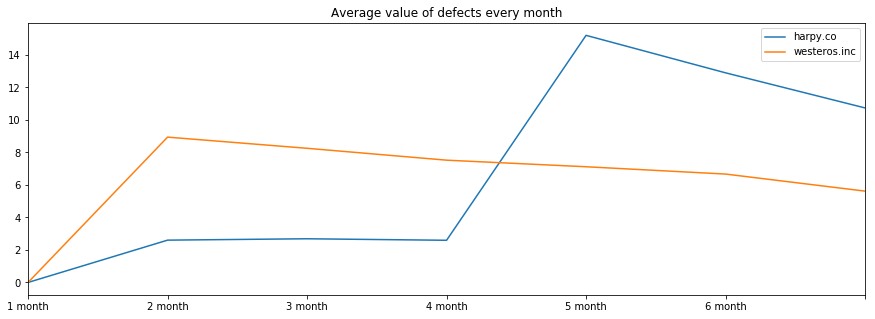

In [113]:
data['duration'] = data['report.date'] - data['production.date']
supplier_duration = data.groupby(['supplier', 'duration'])

duration_mean = supplier_duration['defects'].mean()
harpy_duration_defects = numpy.array(duration_mean['harpy.co'])
westeros_duration_defects = numpy.array(duration_mean['westeros.inc'])


plt = pandas.DataFrame(data=(numpy.array([harpy_duration_defects, westeros_duration_defects])).transpose())
plt.columns = ['harpy.co', 'westeros.inc']

plot = plt.plot(kind='line', figsize=(15, 5), style=['-', '-'])
plot.set_xticklabels(months)

pyplot.title('Average value of defects every month')
pyplot.show()

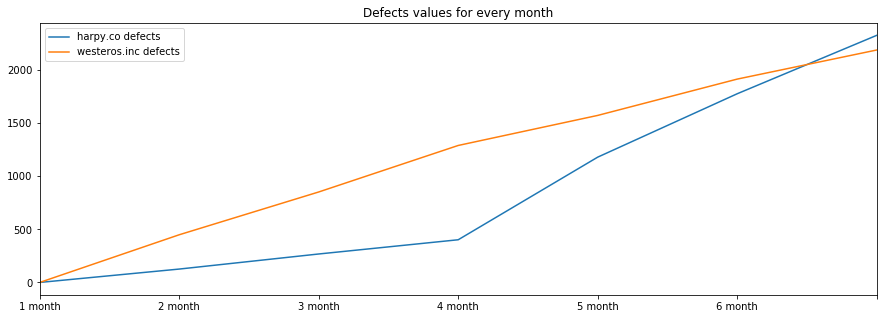

In [119]:
supplier_report = data.groupby(['supplier', 'report.date']);
defects_sum = supplier_report['defects'].sum()
harpy_creation_defects = numpy.array(defects_sum['harpy.co'])
westeros_creation_defects = numpy.array(defects_sum['westeros.inc'])


plt = pandas.DataFrame(data=(numpy.array([harpy_creation_defects, westeros_creation_defects])).transpose())
plt.columns = ['harpy.co defects', 'westeros.inc defects']

plot = plt.plot(kind='line', figsize=(15, 5), style=['-', '-'])
plot.set_xticklabels(months)

pyplot.title('Defects values for every month')
pyplot.show()

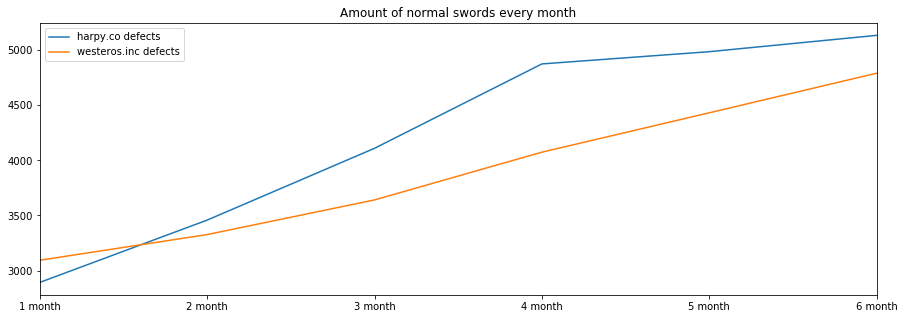

In [116]:
summarize = supplier_creation.agg([numpy.sum])

harpy_normal_swords = numpy.array(summarize.loc['harpy.co']['produced']['sum']) - numpy.array(summarize.loc['harpy.co']['defects']['sum'])
westeros_normal_swords = numpy.array(summarize.loc['westeros.inc']['produced']['sum']) - numpy.array(summarize.loc['westeros.inc']['defects']['sum'])


plt = pandas.DataFrame(data=(numpy.array([harpy_normal_swords, westeros_normal_swords])).transpose())
plt.columns = ['harpy.co defects', 'westeros.inc defects']

plot = plt.plot(kind='line', figsize=(15, 5), style=['-', '-', '-', '-'])
plot.set_xticklabels(months)

pyplot.title('Amount of normal swords every month')
pyplot.show()